# Big Data
-----------------------------
# Author
- Selim Lakhdar
    - selim.lakhdar.etu@univ-lille.fr
    - selim.lakhdar@gmail.com
    
    
# Reviewer
- Abderrahmane Akeniouene

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import Ridge, SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import roc_auc_score

import pickle

In [2]:
dataset_path = '../dataset/train_master.csv'
df = pd.read_csv(dataset_path, index_col=0).dropna()
df

,ID,review_content,review_title,review_stars,product,Target
0,0,En appelant un acheteur pour demander si l'écr...,La Police s'inscrit en acheteur privé sur Pric...,5,2fbb619e3606f9b7c213e858a109cda771aa2c47ce50d5...,0
1,1,"Alors, là, on a affaire au plus grand Navet ja...",Chef D'Oeuvre Absolu en vue...,5,7b56d9d378d9e999d293f301ac43d044cd7b4786d09afb...,1
2,2,Effet garanti sur la terrase. Ils donnent immé...,Effet garanti sur la terrase. Ils donnent immé...,3,7b37bf5dcb2fafd9229897910318a7dfa11a04ca36893c...,0
4,4,Ordinateur de bureau trés bien pour quelqu'un ...,Apple Power MAC G4,3,f574512e7d2dd1dd73c7f8f804bf16f14c932c5651a01b...,1
5,5,"Ma fille adore, elle n'en n'était pas sûre à l...",Comme Hermione,5,a1a58f0f3a35a164fa14bff9e2c1ca8c1202c31499faa1...,1
...,...,...,...,...,...,...
59995,59995,"Bonjour, je suis intereser par votre annonce e...",moto,5,675ebad7919f00b9cb4adb1469054240d8c76018dc27d2...,1
59996,59996,Voline nous raconte en détail un aspect beauco...,Un témoignage fort contre l'oubli,4,a15a274f7d11ed085c745246bb078098e501198956eeeb...,1
59997,59997,D'une bonne matière flexible ce double saura s...,Double plaisir,5,32a26794184ba74118c581b1659e85c2133227e18e97c2...,1
59998,59998,très bien pour compléter des collections de fè...,tres bien,5,018af320f0b08e59032011e0bbc68d42f9486833c0482e...,1


# Visualization

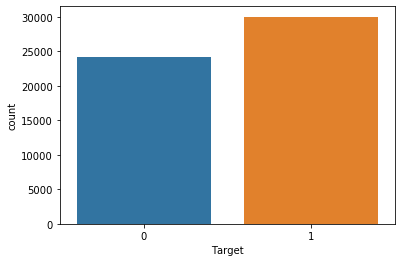

In [3]:
sns.countplot(df['Target'])

In [4]:
counter = df.groupby(['Target', 'review_stars']).size().unstack('Target')
counter

Target,0,1
review_stars,,
1,1637,1865
2,893,757
3,2146,2001
4,4352,5875
5,15108,19499


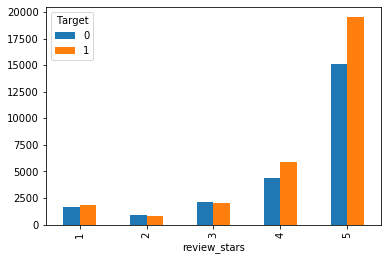

In [5]:
counter.plot(kind='bar')

# Explore

In [6]:
count = CountVectorizer()
title_bag = count.fit_transform(df['review_title'])
print(count.vocabulary_)

{'la': 9134, 'police': 12466, 'inscrit': 8415, 'en': 5737, 'acheteur': 739, 'privé': 12759, 'sur': 15519, 'priceminister': 12725, 'chef': 3266, 'oeuvre': 11353, 'absolu': 673, 'vue': 17124, 'effet': 5587, 'garanti': 7145, 'terrase': 15899, 'ils': 8125, 'donnent': 5052, 'immédiatement': 8156, 'une': 16562, 'touche': 16144, 'déco': 5278, 'très': 16413, 'tendance': 15865, 'gagnent': 7095, 'apple': 1310, 'power': 12632, 'mac': 9694, 'g4': 7077, 'comme': 3688, 'hermione': 7815, 'jouet': 8859, 'neuf': 11048, 'top': 16103, 'magnifique': 9754, 'bonne': 2366, 'machine': 9699, 'chaîne': 3258, 'argent': 1396, 'paquet': 11711, 'de': 4520, 'tournoi': 16166, 'fidéle': 6583, 'super': 15461, 'le': 9271, 'moto': 10632, 'net': 11038, 'ultra': 16548, 'meilleure': 10148, 'platine': 12333, 'bien': 2164, 'expliqué': 6255, 'indispensable': 8308, 'toujours': 16147, 'au': 1636, 'ne': 11001, 'pourrait': 12608, 'on': 11409, 'envisager': 5892, 'partielle': 11803, 'réhabilitation': 14167, 'bon': 2352, 'produit': 1

In [7]:
count = CountVectorizer()
review_bag = count.fit_transform(df['review_content'])
print(count.vocabulary_)

{'en': 21511, 'appelant': 5193, 'un': 60009, 'acheteur': 2845, 'pour': 45169, 'demander': 16772, 'si': 53941, 'écran': 63302, 'qu': 47342, 'il': 29956, 'as': 5925, 'acheté': 2866, 'fonctionne': 25326, 'toujours': 58534, 'répondu': 51914, 'depuis': 16967, 'le': 34184, 'commissariat': 13164, 'était': 64045, 'venu': 60850, 'retirer': 50278, 'objet': 40698, 'précisant': 46472, 'entrée': 22244, 'de': 16359, 'mon': 38213, 'domicile': 18339, 'je': 32476, 'suis': 56139, 'policier': 44656, 'est': 22800, 'resté': 50214, 'assis': 6061, 'et': 22878, 'posé': 45074, 'des': 17022, 'questions': 47496, 'sans': 52585, 'rapport': 48125, 'avec': 6872, 'son': 54762, 'numéro': 40512, 'inscrit': 31177, 'sur': 56389, 'priceminister': 45694, 'renvoi': 49678, 'au': 6488, 'poste': 45055, 'bureau': 9747, 'alors': 4172, 'là': 35443, 'on': 41139, 'affaire': 3331, 'plus': 44437, 'grand': 27542, 'navet': 39684, 'jamais': 32344, 'proposé': 46211, 'par': 42144, 'les': 34359, 'studios': 55846, 'italo': 32185, 'français'

# First try

In [8]:
models_output = "../models/"

In [2]:
french_stemmer = SnowballStemmer('french')

def text_preprocess(text):
    # clean
    text = text.replace('\r', ' ')
    text = text.replace('\n', ' ')
    text = text.lower()
    
    # Tokenise words while ignoring punctuation
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(text)
    
    result = [french_stemmer.stem(token) for token in tokens]
    
    return result

# Create an instance of TfidfVectorizer
vectoriser = TfidfVectorizer(analyzer=text_preprocess)

# Fit to the data and transform to feature matrix
df_vec = vectoriser.fit_transform(df['review_content'])
print('df_vec.shape', df_vec.shape)

# Convert sparse matrix to dataframe
df_vec_reformatted = pd.DataFrame.sparse.from_spmatrix(df_vec)

# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser.vocabulary_.items()}

# Rename each column using the mapping
for col in df_vec_reformatted.columns:
    df_vec_reformatted.rename(columns={col: col_map[col]}, inplace=True)
    
df_vec_reformatted

NameError: name 'df' is not defined

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_vec, df['Target'], test_size=0.3, random_state=123)

print(f'Train dimensions: {X_train.shape, y_train.shape}')
print(f'Test dimensions: {X_test.shape, y_test.shape}')

# Check out target distribution
print('y_train distribution:')
print(y_train.value_counts())
print('y_test distribution:')
print(y_test.value_counts())

Train dimensions: ((37893, 40698), (37893,))
Test dimensions: ((16240, 40698), (16240,))
y_train distribution:
1    21024
0    16869
Name: Target, dtype: int64
y_test distribution:
1    8973
0    7267
Name: Target, dtype: int64


In [11]:
sgd_clf = SGDClassifier(random_state=123)
sgf_clf_scores = cross_val_score(sgd_clf, X_train, y_train, cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (sgf_clf_scores.mean(), sgf_clf_scores.std() * 2))

Accuracy: 0.65 (+/- 0.01)


In [12]:
rdg_clf = Ridge(random_state=123)
rdg_clf_scores = cross_val_score(rdg_clf, X_train, y_train, cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (rdg_clf_scores.mean(), rdg_clf_scores.std() * 2))

Accuracy: 0.11 (+/- 0.02)


In [13]:
lr_clf = LogisticRegression(random_state=123, max_iter=1000)
lr_clf_scores = cross_val_score(lr_clf, X_train, y_train, cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (lr_clf_scores.mean(), lr_clf_scores.std() * 2))

Accuracy: 0.65 (+/- 0.01)


In [14]:
rf_clf = RandomForestClassifier(random_state=123)
rf_clf_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (rf_clf_scores.mean(), rf_clf_scores.std() * 2))

Accuracy: 0.66 (+/- 0.01)


In [15]:
pickle.dump(sgd_clf, open(models_output + "sgd_clf_cv", 'wb'))
pickle.dump(rdg_clf, open(models_output + "rdg_clf_cv", 'wb'))
pickle.dump(lr_clf, open(models_output + "lr_clf_cv", 'wb'))
pickle.dump(rf_clf, open(models_output + "rf_clf_cv", 'wb'))

# ROC_AUC score

In [16]:
# Create an instance of TfidfVectorizer
vectoriser = TfidfVectorizer(analyzer=text_preprocess, max_features=30000)

# Fit to the data and transform to feature matrix
df_vec = vectoriser.fit_transform(df['review_content'])
print('df_vec.shape', df_vec.shape)

df_vec.shape (54133, 30000)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_vec, df['Target'], test_size=0.3, random_state=123)

In [18]:
sgd_clf = SGDClassifier(random_state=123)

sgd_pred = sgd_clf.fit(X_train, y_train).predict(X_test)
roc_auc_score(y_test, sgd_pred)

0.6349745688298019

In [30]:
rdg_clf = Ridge(random_state=123)

rdg_pred = rdg_clf.fit(X_train, y_train).predict(X_test)
roc_auc_score(y_test, rdg_pred)

0.7011727888894271

In [20]:
lr_clf = LogisticRegression(random_state=123, max_iter=1000)

lr_pred = lr_clf.fit(X_train, y_train).predict(X_test)
roc_auc_score(y_test, lr_pred)

0.6438062179750572

In [21]:
rf_clf = RandomForestClassifier(random_state=123)

rf_pred = rf_clf.fit(X_train, y_train).predict(X_test)
roc_auc_score(y_test, rf_pred)

0.6436785165520567

In [31]:
#pickle.dump(sgd_clf, open(models_output + "sgd_clf_roc_auc", 'wb'))
pickle.dump(rdg_clf, open(models_output + "rdg_clf_roc_auc", 'wb'))
#pickle.dump(lr_clf, open(models_output + "lr_clf_roc_auc", 'wb'))
#pickle.dump(rf_clf, open(models_output + "rf_clf_roc_auc", 'wb'))

# Hyperparameter

In [23]:
params_SGD = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"]
}
sgd_clf = SGDClassifier(max_iter=5000, random_state=123)


sgd_grid = GridSearchCV(sgd_clf, params_SGD)
sgd_pred = sgd_grid.fit(X_train, y_train).predict(X_test)
print("roc_auc_score:", roc_auc_score(y_test, sgd_pred))
print(sgd_grid.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Conside

roc_auc_score: 0.6349745688298019
{'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l2'}


In [26]:
params_Ridge = {
    'alpha': [2,1,0.1,0.01,0.001,0.0001], 
    'fit_intercept': [True, False], 
    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}
rdg_clf = Ridge(random_state=123)


rdg_grid = GridSearchCV(rdg_clf, params_Ridge)
rdg_pred = rdg_grid.fit(X_train, y_train).predict(X_test)
print("roc_auc_score:", roc_auc_score(y_test, rdg_pred))
print(rdg_grid.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py", line 548, in fit
    raise ValueError(
ValueError: solver='svd' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  warnings.warn("Estimator fit failed. The score on this train-test"
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:555: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:555: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:555: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/li

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py", line 548, in fit
    raise ValueError(
ValueError: solver='svd' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  warnings.warn("Estimator fit failed. The score on this train-test"
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:555: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:555: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:555: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/li

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py", line 548, in fit
    raise ValueError(
ValueError: solver='svd' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  warnings.warn("Estimator fit failed. The score on this train-test"
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:555: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:555: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:555: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/li

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py", line 548, in fit
    raise ValueError(
ValueError: solver='svd' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  warnings.warn("Estimator fit failed. The score on this train-test"
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:555: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:555: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:555: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/li

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:555: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:555: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:555: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/li

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py", line 503, in _ridge_regression
    raise TypeError('SVD solver does not support sparse'
TypeError: SVD solver does not support sparse inputs currently

  warnings.warn("Estimator fit failed. The score on 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:555: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:555: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:555: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/li

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not 

roc_auc_score: 0.7065040280850502
{'alpha': 2, 'fit_intercept': True, 'solver': 'sag'}


In [27]:
params_LR = {
    "C": [0.001, 0.01, 0.1, 1, 10], 
    "penalty": ["l1","l2"]
}
lr_clf = LogisticRegression(random_state=123, max_iter=1000)


lr_grid = GridSearchCV(lr_clf, params_LR)
lr_pred = lr_grid.fit(X_train, y_train).predict(X_test)
print("roc_auc_score:", roc_auc_score(y_test, lr_pred))
print(lr_grid.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:615: Fi

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:615: Fi

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:615: Fi

roc_auc_score: 0.6438062179750572
{'C': 1, 'penalty': 'l2'}


In [28]:
params_RF = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rf_clf = RandomForestClassifier(random_state=123)


rf_grid = GridSearchCV(rf_clf, params_RF)
rf_pred = rf_grid.fit(X_train, y_train).predict(X_test)
print("roc_auc_score:", roc_auc_score(y_test, rf_pred))
print(rf_grid.best_params_)

roc_auc_score: 0.5248906360075287
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


In [29]:
pickle.dump(sgd_grid, open(models_output + "sgd_grid", 'wb'))
pickle.dump(rdg_grid, open(models_output + "rdg_grid", 'wb'))
pickle.dump(lr_grid, open(models_output + "lr_grid", 'wb'))
pickle.dump(rf_grid, open(models_output + "rf_grid", 'wb'))

# Review
- Amélioration du text preprocess
    - Utiliser les stop words
    - Trouver de nouvelles règles ....
- Traiter le title aussi !
    - Ajout du title au content